# **Linking to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Importing Libraries and Reading The Dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
hd = pd.read_csv('/content/heart.csv')

# **Data Inspection**

## Dataset Description

| Feature      | Description                                                                                    |
| ------------ | ---------------------------------------------------------------------------------------------- |
| **age**      | Age of the patient in years                                                                    |                                                                            
| **sex**      | Gender of the patient (1 = Male, 0 = Female)                                                        |
| **cp**       | Chest pain type (1 = Typical angina, 2 = Atypical angina, 3 = non-anginal, 4 = asymptomatic)                  |
| **trestbps** | Resting blood pressure (in mm Hg on admission to the hospital)                                 |
| **chol**     | Serum cholesterol in mg/dl                                                                     |
| **fbs**      | Fasting blood sugar > 120 mg/dl (1 = True, 0 = False)                                               |
| **restecg**  | Resting electrocardiographic results (0 = Normal, 1= ST-T abnormality, 2 = Left ventricular hypertrophy) |
| **thalach**  | Maximum heart rate achieved                                                                    |
| **exang**    | Exercise-induced angina (1 = Yes, 0 = No)                                                        |
| **oldpeak**  | ST depression induced by exercise relative to rest                                     |
| **slope**    | Slope of the peak exercise ST segment                                                          |
| **ca**       | Number of major vessels (0–3) colored by fluoroscopy                                           |
| **thal**     | Thalassemia status (3 = Normal, 6 = Fixed defect, 7 = Reversable defect)                                |
| **target**      | Predicted attribute (1 = Yes, 0 = No)                                                       |


In [ ]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#!pip install ydata_profiling
#from ydata_profiling import ProfileReport
#profile = ProfileReport(hd)
#profile.to_file("heart_diseases.html")

# **Data Preprocessing**

**Dropping Duplicates**

In [ ]:
print("Number of duplicate rows:", hd.duplicated().sum())

Number of duplicate rows: 723


In [ ]:
hd = hd.drop_duplicates().reset_index(drop=True)

In [ ]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


**Handling invalid values in 'thal' column**

In [ ]:
hd['thal'].replace(0, hd['thal'].mode()[0], inplace=True)

/tmp/ipython-input-425546127.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hd['thal'].replace(0,hd['thal'].mode()[0],inplace=True)


In [ ]:
(hd['thal'] == 0).sum()

np.int64(0)

**Features distributions by quantiles**

In [ ]:
hd.quantile([0, 0.1, 0.25,  0.9, 0.95, 0.99, 0.995, 1], numeric_only=True)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0.000,29.00,0.0,0.0,94.00,126.00,0.0,0.00,71.000,0.0,0.000,0.0,0.00,1.0,0.0
0.100,42.00,0.0,0.0,110.00,188.40,0.0,0.00,116.000,0.0,0.000,1.0,0.00,2.0,0.0
0.250,48.00,0.0,0.0,120.00,211.00,0.0,0.00,133.250,0.0,0.000,1.0,0.00,2.0,0.0
0.900,66.00,1.0,2.0,152.00,308.90,1.0,1.00,176.800,1.0,2.800,2.0,2.00,3.0,1.0
0.950,68.00,1.0,3.0,160.00,326.95,1.0,1.00,181.950,1.0,3.400,2.0,3.00,3.0,1.0
0.990,71.00,1.0,3.0,180.00,406.87,1.0,1.99,191.980,1.0,4.200,2.0,3.99,3.0,1.0
0.995,74.99,1.0,3.0,185.94,412.96,1.0,2.00,194.495,1.0,4.994,2.0,4.00,3.0,1.0
1.000,77.00,1.0,3.0,200.00,564.00,1.0,2.00,202.000,1.0,6.200,2.0,4.00,3.0,1.0


**Removing Outliers**

In [ ]:
hd = hd[hd.chol<hd.chol.quantile(0.995)]
hd = hd[hd.oldpeak<hd.oldpeak.quantile(0.995)]

# **Data Visualization**


**Histograms of some features**

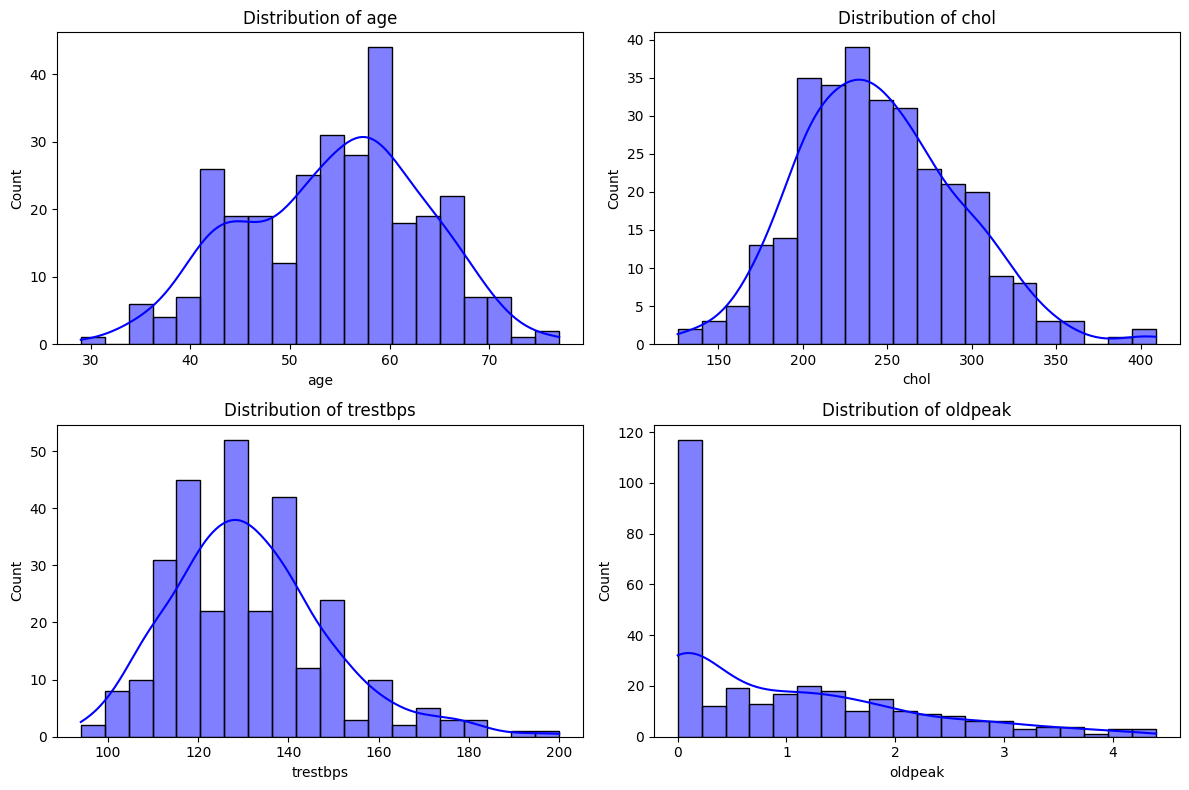

In [ ]:
features=['age','chol','trestbps','oldpeak']
plt.figure(figsize=(12, 8))
for i,col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(hd[col], bins=20, kde=True, color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

**Boxplots for some features VS target**

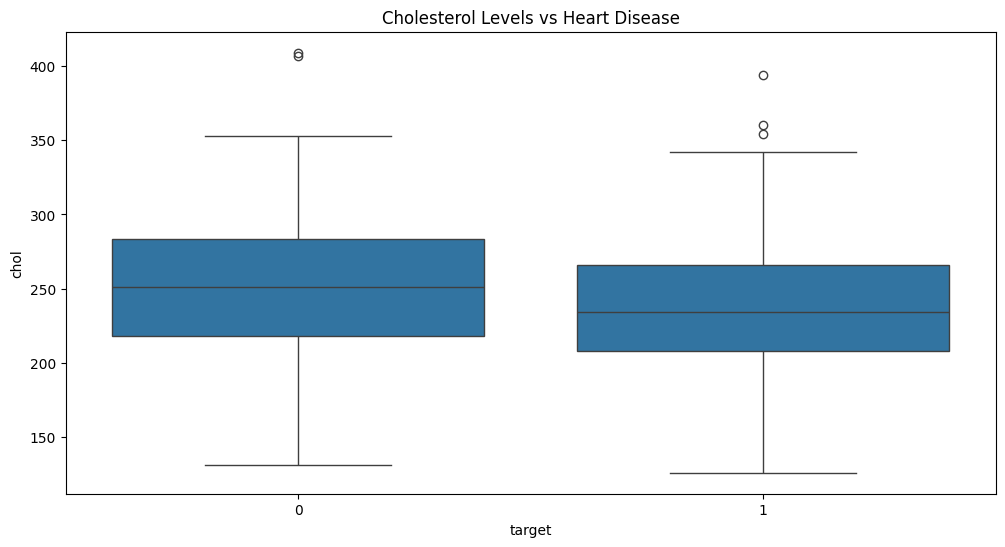

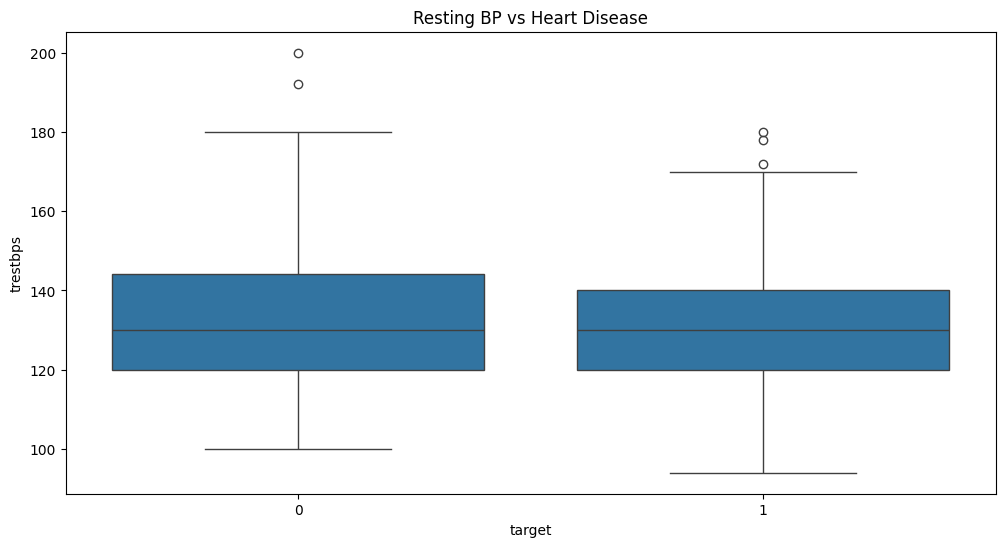

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="target", y="chol", data=hd)
plt.title("Cholesterol Levels VS Heart Disease")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="target", y="trestbps", data=hd)
plt.title("Resting BP VS Heart Disease")
plt.show()

**Heatmap to show the correlation between features**

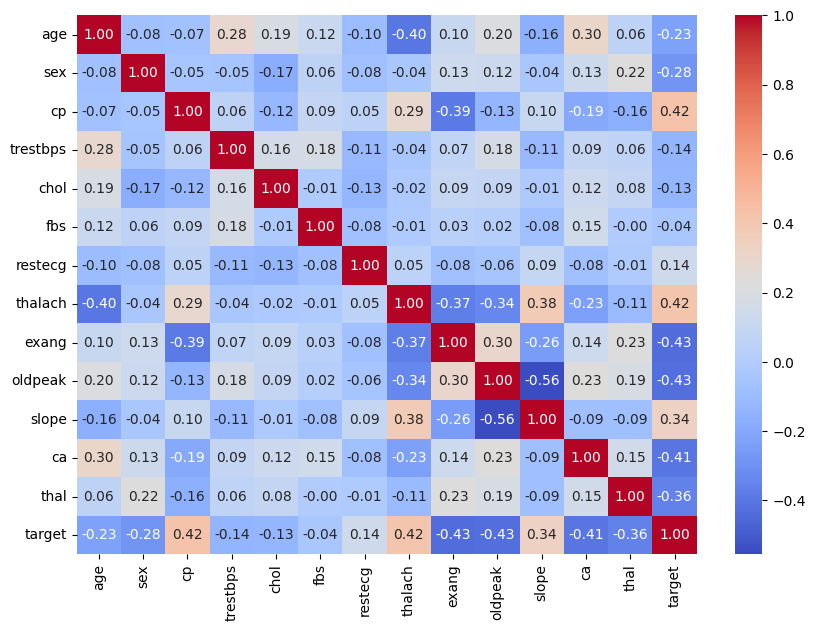

In [ ]:
features=hd.columns.tolist()
plt.figure(figsize=(10, 7))
sns.heatmap(hd[features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

**Target Distribution**

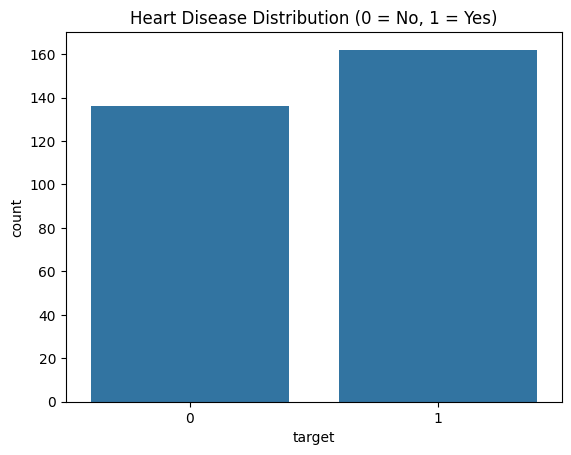

In [ ]:
sns.countplot(x='target', data=hd)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()

#**Data Encoding**

In [ ]:
print(hd.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


* As shown in the cell above, all the features of the dataset has a numerical data type, therefore there is no need for encoding hence it is just used when having categorical data among the dataset

#**Scaling Numerical Features**

In [ ]:
num_cols=['age','cp','trestbps','chol','restecg','thalach','oldpeak','slope','ca','thal']
scaler = MinMaxScaler()
hd[num_cols] = scaler.fit_transform(hd[num_cols])
print(hd[num_cols].describe().T)

          count      mean       std  min       25%       50%       75%  max
age       298.0  0.527405  0.188485  0.0  0.380208  0.541667  0.666667  1.0
cp        298.0  0.321029  0.344153  0.0  0.000000  0.333333  0.666667  1.0
trestbps  298.0  0.353837  0.165700  0.0  0.245283  0.339623  0.433962  1.0
chol      298.0  0.421337  0.167603  0.0  0.300353  0.404594  0.522968  1.0
restecg   298.0  0.265101  0.263089  0.0  0.000000  0.500000  0.500000  1.0
thalach   298.0  0.600415  0.175074  0.0  0.475191  0.622137  0.725191  1.0
oldpeak   298.0  0.229408  0.249514  0.0  0.000000  0.170455  0.363636  1.0
slope     298.0  0.703020  0.304109  0.0  0.500000  0.500000  1.000000  1.0
ca        298.0  0.178691  0.250738  0.0  0.000000  0.000000  0.250000  1.0
thal      298.0  0.661074  0.291683  0.0  0.500000  0.500000  1.000000  1.0


#**Saving The Cleaned Dataset**

In [ ]:
#hd.to_csv("/content/drive/MyDrive/Heart Disease Risks Project/data/clean_heart.csv", index=False)